![example](images/camera-filming-banner2.jpg)

# A Movie Production Analysis for Microsoft

**Authors:** Sameeha Ramadhan

## Overview

This analysis attempts to satisfy the informational needs of Microsoft (MSFT) by investigating the film industry to determine which types of films their new studio should produce. We will look at a number of factors to better understand what contributes to the success of a movie, and in turn offer a few recommendations on the best strategies to get started. Descriptive analysis of popular genres and ratings data show that while the preferred movie types that some people enjoy varies seasonally (think: horror films around Halloween and Christmas movies during the Christmas season), overall the three types of films that are currently doing the best are: . Microsoft can use this analysis to adjust planning, production, and marketing to hit the ground running as they enter this highly competitve space.


 # Business Problem
 ![example](images/data-film.jpg)

Microsoft may be able to enter the movie making sector and successfully stand out from fierce competition by choosing to create films that their target audiences have shown to thoroughly enjoy. Doing so will allow them to produce movies that will instantly become hits, which will in turn allow them to improve on and produce even more content, setting them up to be a studio force to be reckoned with. Using data from well-known industry sources such as Imdb, I analyze and explain patterns in popular movie types based on ratings and reviews, as well as budgeting decisions to help predict what audiences want from a film and thus, guaranteeing its success.

## Data Understanding

Rotten Tomatoes is a well-known review-aggregation website for television and film. Due to its frequent use by the American public, it is widely viewed as the 'go-to' in deciding whether or not a movie or show is worth watching. IMDB.com is a database that is considered the most authoritative source for all film and television related material. The data from both websites provides information such as, but not limited to, budgets, reviews and ratings.

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
#Provided datasets:
title_ratings = pd.read_csv('./data/imdb.title.ratings.csv.gz')
title_akas = pd.read_csv('./data/imdb.title.akas.csv.gz')
name_basics = pd.read_csv('./data/imdb.name.basics.csv.gz')
title_principals = pd.read_csv('./data/imdb.title.principals.csv.gz')
movies = pd.read_csv('./data/tmdb.movies.csv.gz')
movies_gross = pd.read_csv('./data/bom.movie_gross.csv.gz')
movies_budget = pd.read_csv('./data/tn.movie_budgets.csv.gz')
rt_critic_reviews = pd.read_csv('./data/rotten_tomatoes_critic_reviews.csv.gz')
rt_movies = pd.read_csv('./data/rotten_tomatoes_movies.csv.gz')

I will first determine how much profit each movie has made. To do so, we start by looking at the movies_budget data frame.


In [3]:
#Preview the movies_budget data frame.
movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [4]:
#I make a new data frame so I can return to the original one should need be:
profitable_movies = movies_budget
#Then I will need to convert the production_budget, domestic_gross, and worldwide_gross columns to integers in order to 
#make calculations. First, I remove the '$':
profitable_movies.domestic_gross = [x.strip('$') for x in profitable_movies.domestic_gross]
profitable_movies.production_budget = [x.strip('$') for x in profitable_movies.production_budget]
profitable_movies.worldwide_gross = [x.strip('$') for x in profitable_movies.worldwide_gross]

In [5]:
#Then, I remove the commas,
profitable_movies.domestic_gross = profitable_movies['domestic_gross'].astype(str).str.replace(',', '').astype(int) 
profitable_movies.production_budget = profitable_movies['production_budget'].astype(str).str.replace(',', '').astype(int) 
profitable_movies.worldwide_gross = profitable_movies['worldwide_gross'].astype(str).str.replace(',', '').astype(np.int64) 
#Because the numbers in this column are large, I used the .astype(np.int64) method.

Now let's remove all non profitable movies and have a look at our new data frame.

In [6]:
profitable_movies = movies_budget[movies_budget['domestic_gross'] !=0]
profitable_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


Next, I'll create and add a new column by calculating the profit of each film and defining it as profits.

In [7]:
profitable_movies['profit'] = profitable_movies['worldwide_gross'] - profitable_movies['production_budget']
profitable_movies

<ipython-input-7-8c899f854f50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_movies['profit'] = profitable_movies['worldwide_gross'] - profitable_movies['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662


And I'll add a profit margin column so we can really evaluate how much a movie has made:

In [8]:
profitable_movies['profit_margin'] = (profitable_movies['worldwide_gross'] - 
                                    profitable_movies['production_budget'])/profitable_movies['worldwide_gross']
profitable_movies.head(10)

<ipython-input-8-313d2223209d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_movies['profit_margin'] = (profitable_movies['worldwide_gross'] -


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,0.688609
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,0.542645
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,0.658944


Immediately the movie Dark Phoenix stands out as having a negative profit and profit margin which means that the movie did not make money. Since we are trying to determine which movies did the best, I will remove all films with a negative margin and arrange them by profit.

In [9]:
films_with_profit = profitable_movies.loc[profitable_movies['profit'] > 0]
movies_ranked = films_with_profit.sort_values(by=['profit'], ascending=False)

movies_ranked.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,0.909429
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,0.869606
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,0.874895
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,0.851772
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,0.906834
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,0.851660
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,0.869809


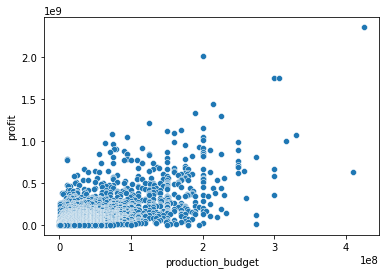

In [22]:
ax1 = sns.scatterplot(x='production_budget', y='profit', data=movies_ranked)
plt.show()

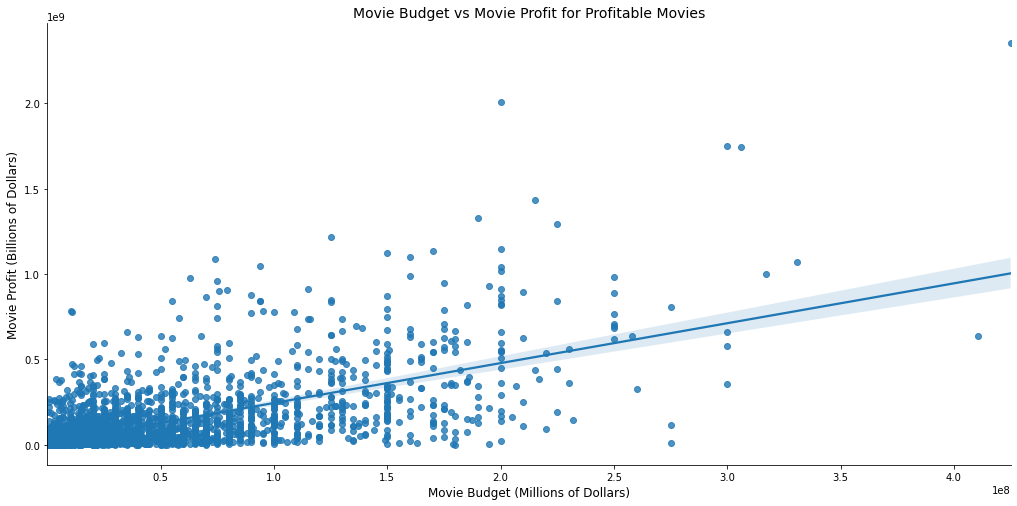

In [25]:
ax1 = sns.lmplot(x='production_budget', y='profit', data=movies_ranked, height=7, aspect=2)
plt.xlabel('Movie Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x')
plt.ylabel('Movie Profit (Billions of Dollars)', fontsize=12)
plt.title('Movie Budget vs Movie Profit for Profitable Movies', fontsize=14);

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [11]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [12]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***